# Netflix Movies and TV Shows Analysis:-

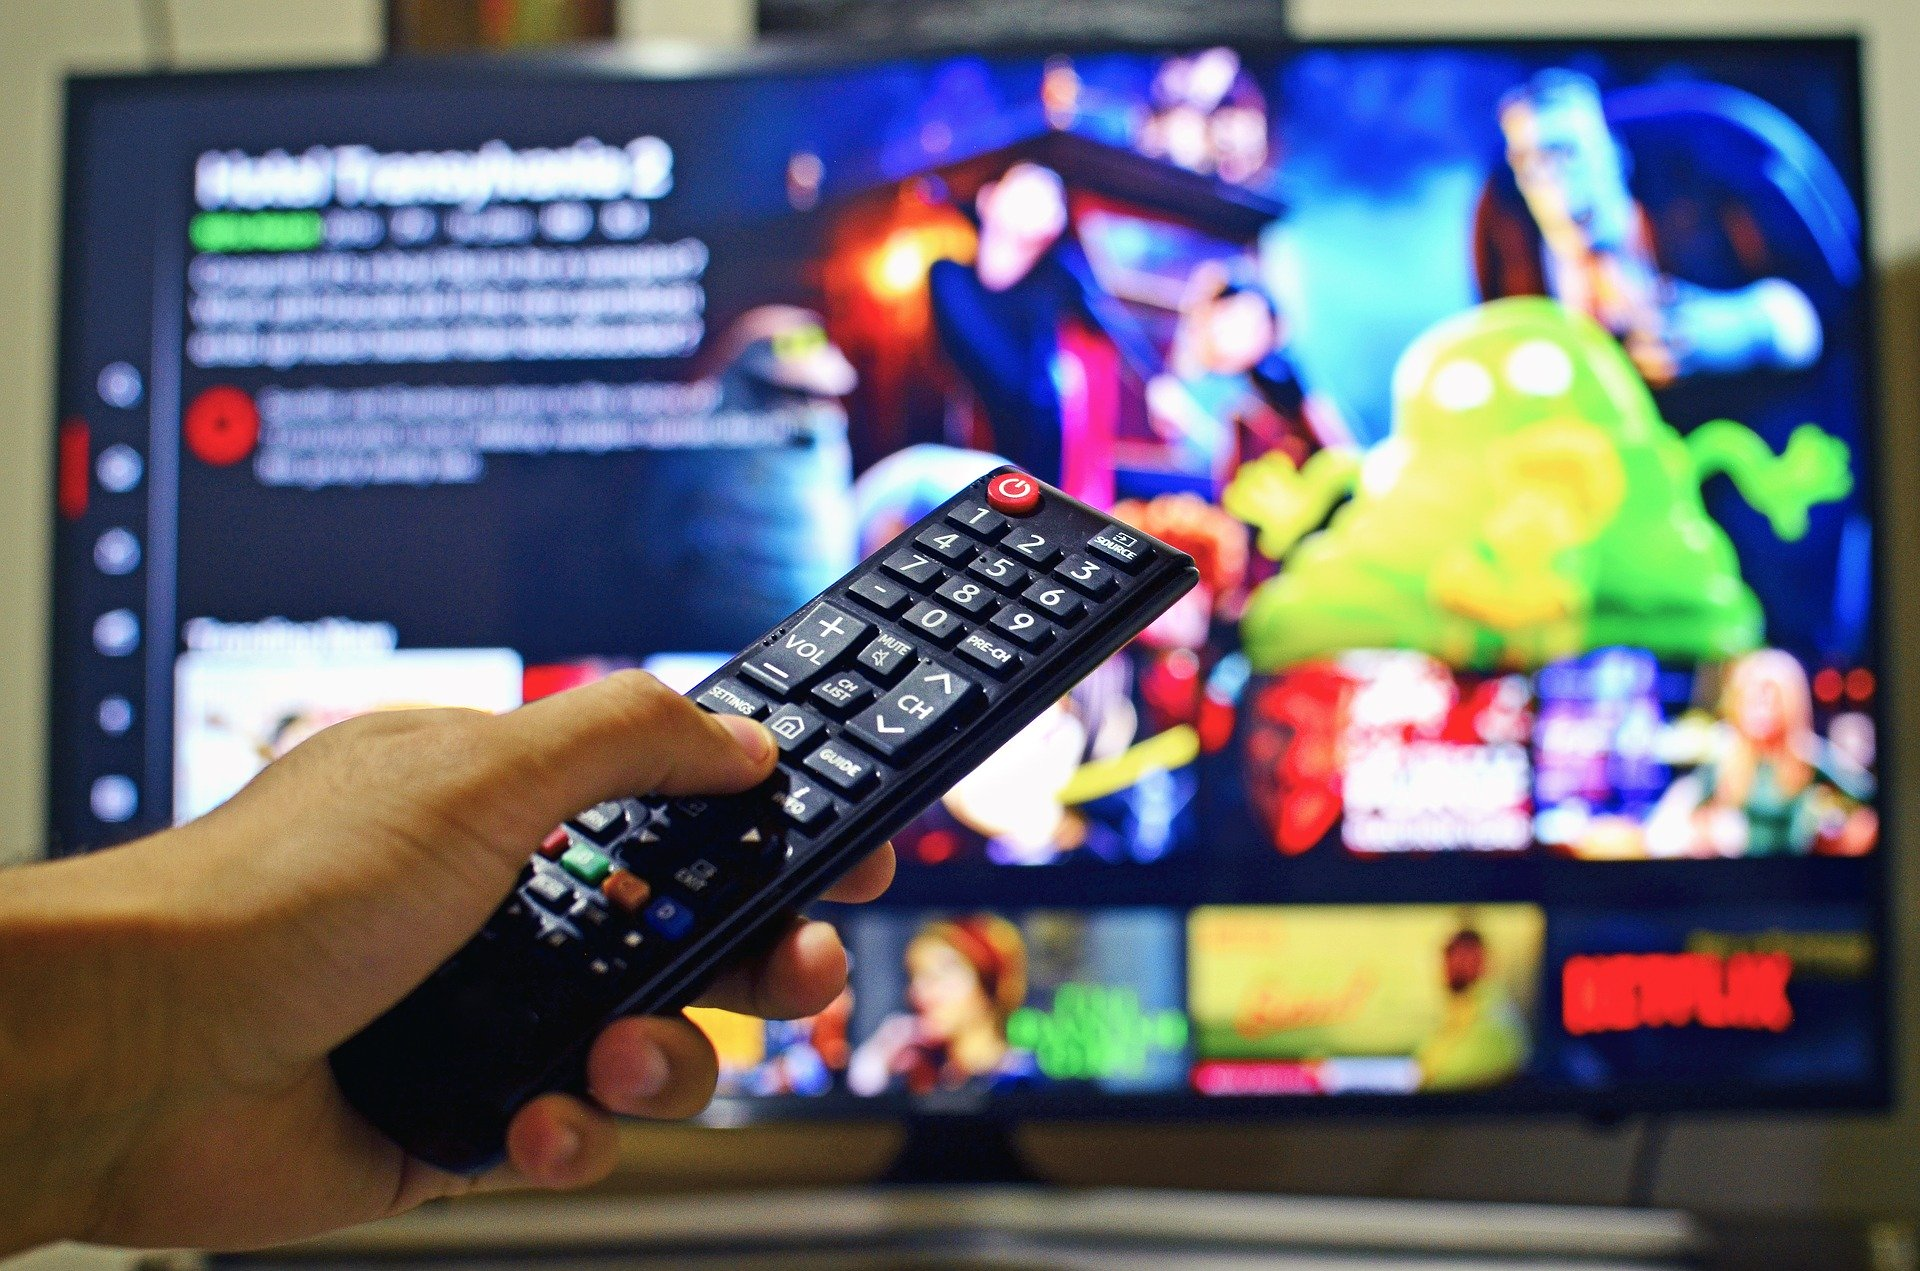

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing required libraries:-

In [ ]:
# Importing required libraries:-

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as ms
plt.rcParams['figure.figsize'] = 10,7

import warnings
warnings.filterwarnings('ignore')

# Load Data:-

In [ ]:
df = pd.read_csv("../input/netflix-shows/netflix_titles.csv",parse_dates=['date_added'])
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df['release_month'] = df['date_added'].dt.month
df['release_day'] = df['date_added'].dt.day
df.head()

# **Checking Null Values:-**

In [ ]:
df.isnull().sum()

In [ ]:
ms.matrix(df,fontsize=20,color=(0.10,0.25,0.10))

**Dropping Unnecessary columns:-**

In [ ]:
df.drop(['date_added','show_id','cast'],axis=1,inplace=True)

# **Data Visualization:-**

In [ ]:
sns.set_style('ticks')
sns.set_context("talk", rc={"lines.linewidth": 2})
ax = sns.barplot(x=df['release_month'].value_counts().keys(),y=df['release_month'].value_counts().values,data=df)
ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("Popular Months to release contents\n",size = 20,color='chocolate')
ax.set_xlabel('\nNumber of Months',size=15,color='r')
ax.set_ylabel('Numbers of released contents',size = 15,color='r')
plt.show()

**~ We can see as December Month is popular for release a new content so, we can fill NaN values with that in release_month column.**

**~ Now, we will see which day of the month is popular and gonna fill NaN values with it in the release_day column.**

In [ ]:
plt.figure(figsize=[20,5])
sns.set_style('darkgrid')
sns.set_context('talk')
fig = sns.barplot(x = df['release_day'].value_counts().keys(),y = df['release_day'].value_counts().values,data=df)
fig.set_xticklabels(fig.get_xticklabels())
fig.set_title('\nDays of Month\n',size = 20,color='chocolate')
fig.set_xlabel('\nNumber of Days',color='r')
fig.set_ylabel('Numbers of contents',color='r')
plt.show()

**1st day of the month is highly preferrable to release the content on Netfix.So,we'll fill up the null values with it in the column.**

In [ ]:
df['release_month'] = df['release_month'].fillna(12.0)
df['release_day'] = df['release_day'].fillna(1.0)
df['release_month'] = df['release_month'].astype(int)
df['release_day'] = df['release_day'].astype(int)
df.head()

In [ ]:
df = df[['type', 'title', 'director', 'country',
        'rating', 'duration', 'listed_in', 'description',
        'release_day','release_month','release_year']]
df.head()

In [ ]:
movies = df[df['type']=='Movie']
sns.set_style('darkgrid')
ax = sns.barplot(x = movies['director'].value_counts().keys()[1:11], y = movies['director'].value_counts().values[1:11]
            ,data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title('Top 10 Directors in Movies\n',color = 'midnightblue',size = 25)
plt.show()

In [ ]:
tv = df[df['type'] == 'TV Show']
ax = sns.barplot(x = tv['director'].value_counts().keys()[0:10],y = tv['director'].value_counts().values[0:10],
                data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title('Top 10 Directors in TV Show\n',color = 'midnightblue',size = 25)
plt.show()

In [ ]:
sns.set_style('dark')
sns.set_context('talk')
ax = sns.countplot(x = 'type',data=df)
ax.set_title("\nMovies Vs TV-Show\n",color='tomato',size = 20)
ax.set_xlabel("\nType of contents",color='r')
ax.set_ylabel('Count',color='r')

for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.35,p.get_height()+0.1),color='magenta')

In [ ]:
df['director'].fillna('Others',inplace=True)
print(df['country'].isnull().any())

In [ ]:
sns.set_style('white')
ax = sns.barplot(x=df['country'].value_counts().keys()[:20],y=df['country'].value_counts().values[:20],data=df)
ax.set_title("\nList of Countries\n",color='goldenrod')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

**As,we can see The United Status of America is the most popular location among all the countries eventhough netflix started to telecast in US since 2007.So,we'll fill Null values with it.**

In [ ]:
df['country'].fillna('United States',inplace=True)
print(df['country'].isnull().any())

In [ ]:
plt.figure(figsize=[20,8])
sns.set_style("dark")
ax = sns.countplot(df['release_year'],data=df)
ax.set_title("Contents Released in each Year\n",color='purple')
ax.set_xlabel("\nRelease Year",color='r')
ax.set_ylabel('Number of Contents',color='r')
plt.xticks(rotation=90)
plt.show()

**We can see in early era there's not much craze to watch movie and Tv series but Netflix gain popularity since the year of 2012 and 2018 is the highest year in which netflix has released more contents on it. However,we can't predict how 2020 will goes?**

In [ ]:
plt.figure(figsize=[20,8])
sns.set_style('darkgrid')
sns.set_context('talk')
ax = sns.countplot(x = df['rating'],data = df)
plt.title('Number of Ratings\n',color='magenta')
ax.set_xlabel('\nRatings',color = 'r',size = 25)
ax.set_ylabel('Count of ratings',color='r',size = 25)
ax.tick_params(axis='both',which = 'both',colors='orange',grid_alpha=0.5,width=6,length=6)
plt.show()

**TV-MA rating would be the top in the rating list so, we'll fill up the NaN values with it.**

In [ ]:
df['rating'].replace(np.nan,'TV-MA',inplace=True)
df['rating'].isnull().any()

In [ ]:
plt.figure(figsize=[20,10])
sns.set_style('darkgrid')
ax = sns.countplot(x = df['rating'],data = df,hue = df['type'])
ax.set_xlabel('\nRatings',color = 'magenta',size = 25)
ax.set_ylabel('Number of Contents',color='magenta',size = 25)
plt.legend(loc=1,fontsize=20,shadow=True,title = 'Category of Contents',title_fontsize = 25)
plt.show()

In [ ]:
df['listed_in'].value_counts()[0:11].plot(kind='barh',color = 'gold')
plt.show()

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=[15,10])
wordcloud = WordCloud(background_color='white',width = 1500,height = 1000).generate(" ".join(df['description']))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
plt.figure(figsize = [20,8])
wordcloud = WordCloud(width = 1500,height = 700).generate(" ".join(df['title']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# **Please Upvote this Kernel if it is helped you.Always welcome for any suggestions.**


# **Thanks For Your Precious Time**
